## 1. Data

Lending Club 2016年Q3数据：https://www.lendingclub.com/info/download-data.action

参考：http://kldavenport.com/lending-club-data-analysis-revisted-with-python/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./LoanStats_2016Q3.csv",skiprows=1,low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99122 entries, 0 to 99121
Columns: 122 entries, id to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(25)
memory usage: 92.3+ MB


In [4]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%,512.60,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%,82.67,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%,880.02,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Keep what we need

In [6]:
# .ix[row slice, column slice] 
df.iloc[:4,:7]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
0,NaN,NaN,15000.0,15000.0,15000.0,36 months,13.99%
1,NaN,NaN,2600.0,2600.0,2600.0,36 months,8.99%
2,NaN,NaN,32200.0,32200.0,32200.0,60 months,21.49%
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,11.49%


In [7]:
df.drop('id',1,inplace=True)
df.drop('member_id',1,inplace=True)

In [8]:
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)

In [10]:
df.iloc[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,15000.0,15000.0,15000.0,36 months,13.99,512.60,C
1,2600.0,2600.0,2600.0,36 months,8.99,82.67,B
2,32200.0,32200.0,32200.0,60 months,21.49,880.02,D
3,10000.0,10000.0,10000.0,36 months,11.49,329.72,B


### Loan Amount Requested Verus the Funded Amount

In [14]:
print (df.loan_amnt != df.funded_amnt)
# .value_counts
# .value_counts()

0        False
1        False
2        False
3        False
4        False
         ...  
99117    False
99118    False
99119    False
99120     True
99121     True
Length: 99122, dtype: bool


In [15]:
df.query('loan_amnt != funded_amnt').head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
99120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.dropna(axis=0, how='all',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 120 entries, loan_amnt to sec_app_mths_since_last_major_derog
dtypes: float64(97), object(23)
memory usage: 91.5+ MB


In [18]:
df.dropna(axis=1, how='all',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 108 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), object(23)
memory usage: 82.4+ MB


In [21]:
df.iloc[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,Fiscal Director,2 years,RENT,55000.0,Not Verified,Sep-2016,Current
1,Loaner Coordinator,3 years,RENT,35000.0,Source Verified,Sep-2016,Fully Paid
2,warehouse/supervisor,10+ years,MORTGAGE,65000.0,Not Verified,Sep-2016,Fully Paid
3,Teacher,10+ years,OWN,55900.0,Not Verified,Sep-2016,Current
4,SERVICE MGR,5 years,RENT,33000.0,Not Verified,Sep-2016,Current


### emp_title: employment title

In [22]:
print(df.emp_title.value_counts().head())
print(df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Teacher       1931
Manager       1701
Owner          990
Supervisor     785
Driver         756
Name: emp_title, dtype: int64
Research Strategist                 1
Level 3 Skilled Material Handler    1
Anesthesia Technician               1
DEPUTY                              1
Digital Press Operator              1
Name: emp_title, dtype: int64


(37421,)

In [23]:
df.drop(['emp_title'],1, inplace=True)

In [24]:
df.iloc[:5,8:15]

,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan
0,2 years,RENT,55000.0,Not Verified,Sep-2016,Current,n
1,3 years,RENT,35000.0,Source Verified,Sep-2016,Fully Paid,n
2,10+ years,MORTGAGE,65000.0,Not Verified,Sep-2016,Fully Paid,n
3,10+ years,OWN,55900.0,Not Verified,Sep-2016,Current,n
4,5 years,RENT,33000.0,Not Verified,Sep-2016,Current,n


### emp_length: employment length

In [25]:
df.emp_length.value_counts()

10+ years    34219
2 years       9066
3 years       7925
< 1 year      7104
1 year        6991
5 years       6170
4 years       6022
6 years       4406
8 years       4168
9 years       3922
7 years       3205
Name: emp_length, dtype: int64

In [26]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [27]:
df.emp_length.value_counts()

10    34219
1     14095
2      9066
3      7925
5      6170
4      6022
0      5922
6      4406
8      4168
9      3922
7      3205
Name: emp_length, dtype: int64

### verification status:"Indicates if income was verified by LC, not verified, or if the income source was verified"

In [28]:
df.verification_status.value_counts()

Source Verified    40781
Verified           31356
Not Verified       26983
Name: verification_status, dtype: int64

### Target: Loan Statuses

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Columns: 107 entries, loan_amnt to total_il_high_credit_limit
dtypes: float64(85), int32(1), object(21)
memory usage: 81.3+ MB


In [30]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=107)

In [31]:
pd.unique(df['loan_status'].values.ravel())

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'Charged Off',
       'Late (16-30 days)', 'In Grace Period', 'Default'], dtype=object)

In [32]:
for col in df.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column term has 2 unique instances
Column grade has 7 unique instances
Column sub_grade has 35 unique instances
Column home_ownership has 4 unique instances
Column verification_status has 3 unique instances
Column issue_d has 3 unique instances
Column loan_status has 7 unique instances
Column pymnt_plan has 2 unique instances
Column desc has 6 unique instances
Column purpose has 13 unique instances
Column title has 13 unique instances
Column zip_code has 873 unique instances
Column addr_state has 50 unique instances
Column earliest_cr_line has 614 unique instances
Column revol_util has 1087 unique instances
Column initial_list_status has 2 unique instances
Column last_pymnt_d has 13 unique instances
Column next_pymnt_d has 4 unique instances
Column last_credit_pull_d has 14 unique instances
Column application_type has 3 unique instances
Column verification_status_joint has 2 unique instances


In [33]:
# 处理对象类型的缺失，unique
df.select_dtypes(include=['O']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,unique,top,freq,missing_pct
term,99120,2,36 months,73898,0.000000
grade,99120,7,C,32846,0.000000
sub_grade,99120,35,B5,8322,0.000000
home_ownership,99120,4,MORTGAGE,46761,0.000000
verification_status,99120,3,Source Verified,40781,0.000000
issue_d,99120,3,Aug-2016,36280,0.000000
loan_status,99120,7,Current,79445,0.000000
pymnt_plan,99120,2,n,99074,0.000000
desc,6,5,,2,0.999939
purpose,99120,13,debt_consolidation,57682,0.000000


In [34]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

In [35]:
# missing_pct
df.drop('desc',1,inplace=True)
df.drop('verification_status_joint',1,inplace=True)

In [36]:
df.drop('zip_code',1,inplace=True)
df.drop('addr_state',1,inplace=True)
df.drop('earliest_cr_line',1,inplace=True)
df.drop('revol_util',1,inplace=True)
df.drop('purpose',1,inplace=True)
df.drop('title',1,inplace=True)
df.drop('term',1,inplace=True)
df.drop('issue_d',1,inplace=True)
# df.drop('',1,inplace=True)
# 贷后相关的字段
df.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp', 'grade', 'sub_grade'] ,1, inplace=True)
df.drop(['total_rec_int','total_rec_late_fee',
         'recoveries','collection_recovery_fee',
         'collection_recovery_fee' ],1, inplace=True)
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)
df.drop(['policy_code'],1, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99120 entries, 0 to 99119
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_amnt                       99120 non-null  float64
 1   funded_amnt                     99120 non-null  float64
 2   funded_amnt_inv                 99120 non-null  float64
 3   int_rate                        99120 non-null  float64
 4   installment                     99120 non-null  float64
 5   emp_length                      99120 non-null  int32  
 6   home_ownership                  99120 non-null  object 
 7   annual_inc                      99120 non-null  float64
 8   verification_status             99120 non-null  object 
 9   loan_status                     99120 non-null  object 
 10  pymnt_plan                      99120 non-null  object 
 11  dti                             99120 non-null  float64
 12  delinq_2yrs                     

In [39]:
df.iloc[:5,:10]

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status
0,15000.0,15000.0,15000.0,13.99,512.60,2,RENT,55000.0,Not Verified,Current
1,2600.0,2600.0,2600.0,8.99,82.67,3,RENT,35000.0,Source Verified,Fully Paid
2,32200.0,32200.0,32200.0,21.49,880.02,10,MORTGAGE,65000.0,Not Verified,Fully Paid
3,10000.0,10000.0,10000.0,11.49,329.72,10,OWN,55900.0,Not Verified,Current
4,6000.0,6000.0,6000.0,13.49,203.59,5,RENT,33000.0,Not Verified,Current


In [42]:
df.iloc[:5,10:21]

,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,initial_list_status
0,n,23.78,1.0,0.0,7.0,NaN,22.0,0.0,21345.0,43.0,f
1,n,6.73,0.0,0.0,NaN,NaN,14.0,0.0,720.0,24.0,w
2,n,11.71,0.0,1.0,NaN,87.0,17.0,1.0,11987.0,34.0,w
3,n,26.21,0.0,2.0,NaN,NaN,15.0,0.0,17209.0,62.0,w
4,n,19.05,0.0,0.0,NaN,NaN,3.0,0.0,4576.0,11.0,f


In [41]:
print(df.columns)
print(df.head(1).values)
df.info()

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'total_acc', 'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_o

In [43]:
df.select_dtypes(include=['float']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
loan_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.0
funded_amnt,99120.0,14170.570521,8886.138758,1000.00,7200.00,12000.00,20000.00,40000.00,0.0
funded_amnt_inv,99120.0,14166.087823,8883.301328,1000.00,7200.00,12000.00,20000.00,40000.00,0.0
int_rate,99120.0,13.723641,4.873910,5.32,10.49,12.79,15.59,30.99,0.0
installment,99120.0,432.718654,272.678596,30.12,235.24,361.38,569.83,1535.71,0.0
...,...,...,...,...,...,...,...,...,...
tax_liens,99120.0,0.075393,0.517275,0.00,0.00,0.00,0.00,61.00,0.0
tot_hi_cred_lim,99120.0,172185.283394,175273.669652,2500.00,49130.75,108020.50,248473.25,3953111.00,0.0
total_bal_ex_mort,99120.0,50818.694078,48976.640478,0.00,20913.00,37747.50,64216.25,1548128.00,0.0
total_bc_limit,99120.0,20862.228420,20721.900664,0.00,7700.00,14700.00,27000.00,520500.00,0.0


In [44]:
df.drop('annual_inc_joint',1,inplace=True)
df.drop('dti_joint',1,inplace=True)

In [45]:
df.select_dtypes(include=['int']).describe().T.\
assign(missing_pct=df.apply(lambda x : (len(x)-x.count())/float(len(x))))

,count,mean,std,min,25%,50%,75%,max,missing_pct
emp_length,99120.0,5.757092,3.770359,0.0,2.0,6.0,10.0,10.0,0.0


### Target: Loan Statuses

In [46]:
df['loan_status'].value_counts()
# .plot(kind='bar')

Current               79445
Fully Paid            13066
Charged Off            2502
Late (31-120 days)     2245
In Grace Period        1407
Late (16-30 days)       454
Default                   1
Name: loan_status, dtype: int64

In [47]:
df.loan_status.replace('Fully Paid', int(1),inplace=True)
df.loan_status.replace('Current', int(1),inplace=True)
df.loan_status.replace('Late (16-30 days)', int(0),inplace=True)
df.loan_status.replace('Late (31-120 days)', int(0),inplace=True)
df.loan_status.replace('Charged Off', np.nan,inplace=True)
df.loan_status.replace('In Grace Period', np.nan,inplace=True)
df.loan_status.replace('Default', np.nan,inplace=True)
# df.loan_status.astype('int')
df.loan_status.value_counts()

1.0    92511
0.0     2699
Name: loan_status, dtype: int64

In [48]:
# df.loan_status
df.dropna(subset=['loan_status'],inplace=True)

### Highly Correlated Data

In [49]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

funded_amnt                 loan_amnt            1.000000
funded_amnt_inv             loan_amnt            0.999994
                            funded_amnt          0.999994
installment                 loan_amnt            0.953380
                            funded_amnt          0.953380
                                                   ...   
total_bc_limit              num_bc_sats          0.633461
total_il_high_credit_limit  open_il_6m           0.552023
                            total_bal_il         0.960349
                            num_il_tl            0.583329
                            total_bal_ex_mort    0.889238
Length: 93, dtype: float64

In [50]:
df.drop(['funded_amnt','funded_amnt_inv', 'installment'], axis=1, inplace=True)

## 2. Our Model

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder #https://ljalphabeta.gitbooks.io/python-/content/categorical_data.html

In [52]:
Y = df.loan_status
X = df.drop('loan_status',1,inplace=False)

In [55]:
print(Y.shape)
print(sum(Y))

(95210,)
92511.0


In [54]:
X = pd.get_dummies(X)

In [57]:
print X.columns
print X.head(1).values
X.info()

Index([u'loan_amnt', u'int_rate', u'emp_length', u'annual_inc', u'dti',
       u'delinq_2yrs', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'total_acc', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_bal_bc', u'all_util',
       u'total_rev_hi_lim', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'acc_open_past_24mths', u'avg_cur_bal', u'bc_open_to_buy', u'bc_util',
       u'chargeoff_within_12_mths', u'delinq_amnt', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op', u'mo_sin_rcnt_rev_tl_op', u'mo_sin_rcnt_tl',
       u'mort_acc', u'mths_since_recent_bc', u'mths_since_recent_bc_dlq',
       u'mths_since_recent_inq', u'mths_since_recent_revol_delinq',
  

In [56]:
X.fillna(0.0,inplace=True)
X.fillna(0,inplace=True)

### Train Data & Test Data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=123)

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(66647, 84)
(66647,)
(28563, 84)
(28563,)


In [60]:
print(y_train.value_counts())
print(y_test.value_counts())

1.0    64712
0.0     1935
Name: loan_status, dtype: int64
1.0    27799
0.0      764
Name: loan_status, dtype: int64


### Gradient Boosting Regression Tree

In [62]:
# param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
#               'max_depth': [1,2,3,4],
#               'min_samples_split': [50,100,200,400],
#               'n_estimators': [100,200,400,800]
#               }

param_grid = {'learning_rate': [0.1],
              'max_depth': [2],
              'min_samples_split': [50,100],
              'n_estimators': [100,200]
              }
# param_grid = {'learning_rate': [0.1],
#               'max_depth': [4],
#               'min_samples_leaf': [3],
#               'max_features': [1.0],
#               }

est = GridSearchCV(ensemble.GradientBoostingRegressor(),
                   param_grid, n_jobs=4, refit=True)

est.fit(x_train, y_train)

best_params = est.best_params_
print(best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}


In [63]:
print(best_params)

{'learning_rate': 0.1, 'max_depth': 2, 'min_samples_split': 50, 'n_estimators': 100}


In [64]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=300,
                                         learning_rate=0.1,max_depth=1, random_state=0,loss='ls').\
fit(x_train, y_train)

Wall time: 1min 20s


In [65]:
est.score(x_test,y_test)

0.028311715416076022

In [66]:
%%time
est = ensemble.GradientBoostingRegressor(min_samples_split=50,n_estimators=100,
                                         learning_rate=0.1,max_depth=2, random_state=0,loss='ls').\
fit(x_train, y_train)

Wall time: 51.9 s


In [67]:
est.score(x_test,y_test)

0.029210266192750467

In [68]:
# 模型好坏用户的评估区分度
def compute_ks(data):

    sorted_list = data.sort_values(['predict'], ascending=[True])

    total_bad = sorted_list['label'].sum(axis=None, skipna=None, level=None, numeric_only=None) / 3
    total_good = sorted_list.shape[0] - total_bad

    # print "total_bad = ", total_bad
    # print "total_good = ", total_good

    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0

        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks, val)

    return max_ks

In [70]:
test_pd = pd.DataFrame()
test_pd['predict'] = est.predict(x_test)
test_pd['label'] = y_test
# df['predict'] = est.predict(x_test)
print(compute_ks(test_pd[['label','predict']]))

0.0


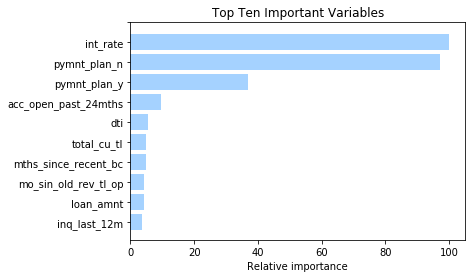

In [71]:
# Top Ten
feature_importance = est.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

### Other Model

In [72]:
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor

0.9732521093722648
0.0
[0.         0.07651252 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00154799 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.0032182  0.45276618
 0.4659551  0.         0.         0.         0.         0.        ]


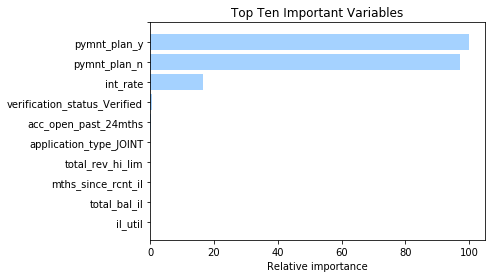

In [75]:
# XGBoost
clf2 = xgb.XGBClassifier(n_estimators=50, max_depth=1, 
                            learning_rate=0.01, subsample=0.8, colsample_bytree=0.3,scale_pos_weight=3.0, 
                             silent=True, nthread=-1, seed=0, missing=None,objective='binary:logistic', 
                             reg_alpha=1, reg_lambda=1, 
                             gamma=0, min_child_weight=1, 
                             max_delta_step=0,base_score=0.5)

clf2.fit(x_train, y_train)
print(clf2.score(x_test, y_test))
test_pd2 = pd.DataFrame()
test_pd2['predict'] = clf2.predict(x_test)
test_pd2['label'] = y_test
print(compute_ks(test_pd[['label','predict']]))
print(clf2.feature_importances_)
# Top Ten
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.024598452323976727
0.0
[1.70171138e-02 1.22652447e-01 6.30708081e-03 1.19131791e-02
 2.20216928e-02 8.79821851e-03 4.93278061e-03 8.52443289e-03
 7.49971494e-03 5.04376425e-03 5.78252070e-03 1.37711223e-02
 1.08689863e-02 1.43604107e-03 8.43296945e-03 0.00000000e+00
 1.46064909e-02 1.06173819e-02 6.99788141e-03 6.41293625e-03
 4.12924418e-03 8.98599525e-03 1.08376756e-02 8.80382836e-03
 1.72253275e-02 8.02049486e-03 9.02056937e-03 2.10930581e-02
 1.85352446e-02 1.72459860e-02 7.54565649e-03 2.30667393e-02
 1.53808647e-02 1.36311193e-02 1.46226367e-02 1.42002675e-02
 1.76735327e-02 3.88138710e-03 1.25524946e-03 2.81120278e-02
 2.87387942e-02 1.08475483e-02 8.37034764e-03 1.05848991e-02
 1.76307937e-02 3.63829826e-03 9.65819412e-03 8.29840317e-03
 8.68164404e-03 5.20219219e-03 6.38162306e-03 5.53901848e-03
 1.12292042e-02 8.81153729e-03 6.87492287e-03 1.69736006e-02
 7.45291937e-03 4.29349741e-03 0.00000000e+00 2.56324520e-03
 4.93807914e-03 4.98934396e-03 1.78085643e-02 6.55505877e-03

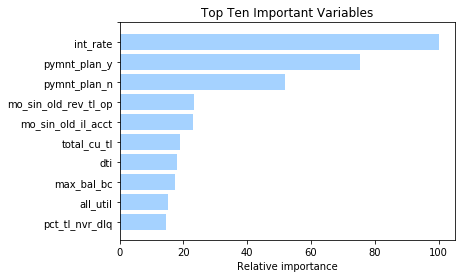

In [77]:
# RFR
clf3 = RandomForestRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf3.fit(x_train, y_train)
print(clf3.score(x_test, y_test))
test_pd3 = pd.DataFrame()
test_pd3['predict'] = clf3.predict(x_test)
test_pd3['label'] = y_test
print(compute_ks(test_pd[['label','predict']]))
print(clf3.feature_importances_)
# Top Ten
feature_importance = clf3.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

0.02642879152820621
0.0
[0.00952311 0.17042267 0.00583099 0.00584575 0.00706804 0.01377581
 0.01050168 0.00537819 0.00629466 0.00463838 0.01194383 0.00795893
 0.00627099 0.00577699 0.00534482 0.00200429 0.01238676 0.00344734
 0.01007212 0.0070046  0.00871036 0.00935149 0.00712127 0.00525719
 0.00948828 0.00821407 0.00944399 0.0115955  0.00942768 0.00608911
 0.00872127 0.01773905 0.01331596 0.01043992 0.00471404 0.00797106
 0.00828997 0.01059793 0.00198441 0.01166274 0.01094044 0.00844285
 0.01113833 0.00983926 0.01392797 0.00513299 0.00656532 0.00730351
 0.01074832 0.00488127 0.00672145 0.00563316 0.00958453 0.00614775
 0.00577542 0.01246103 0.00697868 0.00528845 0.00055851 0.0054171
 0.00811044 0.00681755 0.01157288 0.00770197 0.00544166 0.01541847
 0.00443727 0.00428825 0.00553539 0.00519629 0.         0.0054567
 0.00273556 0.00544176 0.0036546  0.00318864 0.0132062  0.11023794
 0.12613118 0.00199557 0.00216339 0.00414336 0.00135406 0.00065928]


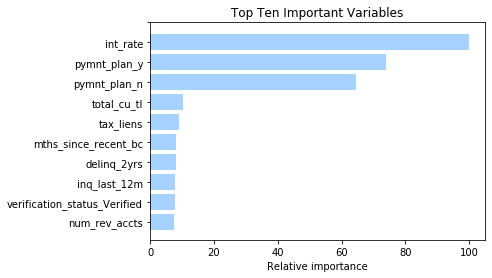

In [78]:
# XTR
clf4 = ExtraTreesRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf4.fit(x_train, y_train)
print(clf4.score(x_test, y_test))
test_pd4 = pd.DataFrame()
test_pd4['predict'] = clf4.predict(x_test)
test_pd4['label'] = y_test
print(compute_ks(test_pd[['label','predict']]))
print(clf4.feature_importances_)
# Top Ten
feature_importance = clf4.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

In [81]:
import joblib

In [84]:
joblib.dump(clf4,'clf4.pkl')

['clf4.pkl']

In [85]:
joblib.dump(est,'est.pkl')

['est.pkl']

In [87]:
joblib.dump(Y,'Y.pkl')

['Y.pkl']

## 作业：
### 1. feature-engineering
### 2. stacking
### 3. 画出ROC曲线和KS曲线对比

In [80]:
# 特征工程方法1：histogram
# 值域分布
def get_histogram_features(full_dataset):
    def extract_histogram(x):
        count, _ = np.histogram(x, bins=[0, 10, 100, 1000, 10000, 100000, 1000000, 9000000])
        return count
    column_names = ["hist_{}".format(i) for i in range(8)]
    hist = full_dataset.apply(lambda row: pd.Series(extract_histogram(row)), axis=1)
    hist.columns= column_names
    return hist
# 特征工程方法2：quantile
# 频域分布
q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
column_names = ["quantile_{}".format(i) for i in q]
# print pd.DataFrame(train_x)
quantile = pd.DataFrame(x_train).quantile(q=q, axis=1).T
quantile.columns = column_names
# 特征工程方法3：cumsum
def get_cumsum_features(all_features):
    column_names = ["cumsum_{}".format(i) for i in range(len(all_features))]
    cumsum = full_dataset[all_features].cumsum(axis=1)
    cumsum.columns = column_names
    return cumsum
# 特征工程方法4：特征归一化
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x_train_normal = Scaler.fit_transform(x_train_normal)

NameError: name 'x_train_normal' is not defined